### Titanic Survival Prediction

You are a data scientist / AI engineer working on a binary classification problem to predict the survival of passengers from the Titanic crash. You have been provided with a dataset named **`"titanic.csv"`** which includes various features of passengers to predict whether they survived or not. The dataset comprises the following columns:

- `passenger_id:` The unique identifier for each passenger.
- `name:` The name of the passenger.
- `p_class:` The passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
- `sex:` The gender of the passenger.
- `age:` The age of the passenger.
- `sib_sp:` The number of siblings or spouses the passenger had aboard the Titanic.
- `parch:` The number of parents or children the passenger had aboard the Titanic.
- `ticket:` The ticket number of the passenger.
- `fare:` The fare the passenger paid for the ticket.
- `cabin:` The cabin number where the passenger stayed.
- `embarked:` The port where the passenger boarded the Titanic (C = Cherbourg; Q = Queenstown; S = Southampton).
- `survived:` Whether the passenger survived (1) or not (0).

Your task is to use this dataset to build and evaluate a `Gaussian Naive Bayes` model to predict whether a passenger survived based on their features. You will also evaluate the model's performance using precision, recall, and other classification metrics.

## Problem statement

Predict whether a Titanic passenger survived (1) or not (0) based on features in `titanic.csv`. 
We will: explore data, handle missing values, preprocess, train a Gaussian Naive Bayes model, and evaluate it.

**Import Necessary Libraries**

In [41]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# plotting style
sns.set(style="whitegrid")
%matplotlib inline

### Task 1: Data Preparation and Exploration

1. Import the data from the `"titanic.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset.
5. Drop columns that do not add much value `(passenger_id, name, sib_sp, parch, ticket, cabin, embarked)`.
6. Visualize the distribution of the target variable `survived` and `p_class` using a bar chart.
7. Visualize the distribution of `sex` using a pie chart (percentage).
8. Visualize the distribution of `age` and `fare` using histograms.

In [42]:
# Step 1: Import the data from the "titanic.csv" file and store it in a variable df
df = pd.read_csv('titanic.csv')   
print("Rows, cols:", df.shape)
df.head()

# Step 2: Display the number of rows and columns in the dataset


# Step 3: Display the first few rows of the dataset to get an overview


Rows, cols: (891, 12)


,passenger_id,name,p_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,NaN,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [43]:
# Step 4: Check for any missing values in the dataset 
df.info()
df.describe(include='all').T
print("\nMissing values per column:\n", df.isnull().sum())
#info() shows types and non-null counts; isnull().sum() tells us what needs attention.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   name          891 non-null    object 
 2   p_class       891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sib_sp        891 non-null    int64  
 6   parch         891 non-null    int64  
 7   ticket        891 non-null    object 
 8   fare          882 non-null    float64
 9   cabin         204 non-null    object 
 10  embarked      889 non-null    object 
 11  survived      891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values per column:
 passenger_id      0
name              0
p_class           0
sex               0
age             177
sib_sp            0
parch             0
ticket            0
fare              9
cabin           687
e

In [44]:
# Step 5: Drop columns that do not add much value (passenger_id, name, sib_sp, parch, ticket, cabin, embarked)
cols_to_drop = ['passenger_id', 'name', 'ticket', 'cabin']   # adapt if your column names differ
for c in cols_to_drop:
    if c in df.columns:
        df = df.drop(columns=c)
df.shape

(891, 8)

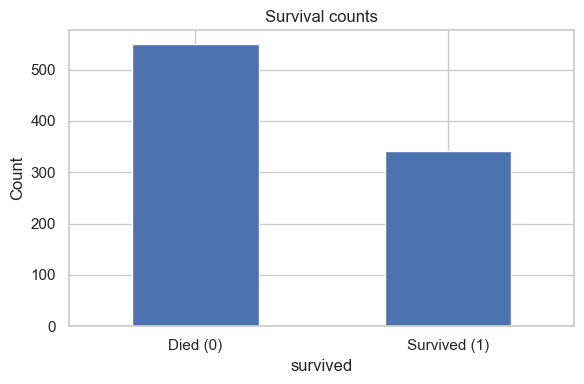

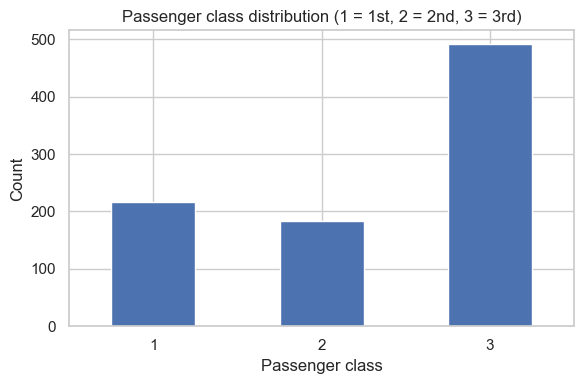

In [45]:
# Step 6: Visualize the distribution
plt.figure(figsize=(6,4))
surv_counts = df['survived'].value_counts().sort_index()   # 0 = died, 1 = survived
surv_counts.plot(kind='bar', rot=0)
plt.xticks([0,1], ['Died (0)', 'Survived (1)'])
plt.ylabel('Count')
plt.title('Survival counts')
plt.tight_layout()
plt.show()

#'survived'
plt.figure(figsize=(6,4))
pclass_counts = df['p_class'].value_counts().sort_index()
pclass_counts.plot(kind='bar', rot=0)
plt.xlabel('Passenger class')
plt.ylabel('Count')
plt.title('Passenger class distribution (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.tight_layout()
plt.show()

# 'p_class'


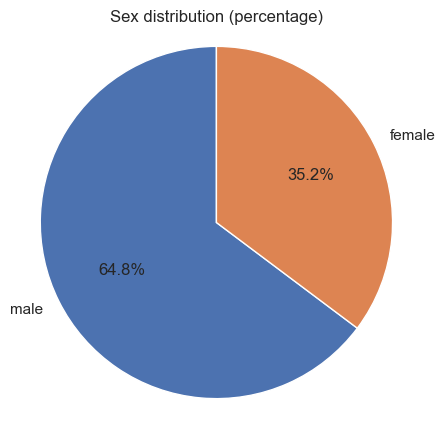

Counts:
 sex
male      577
female    314
Name: count, dtype: int64


In [46]:
# Step 7: Visualize the distribution of 'sex' using a pie chart (percentage)
sex_counts = df['sex'].value_counts(dropna=False)
plt.figure(figsize=(5,5))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sex distribution (percentage)')
plt.axis('equal')   # circle
plt.show()

# print numeric counts too
print("Counts:\n", sex_counts)

Age: mean=29.70, median=28.00, missing=177


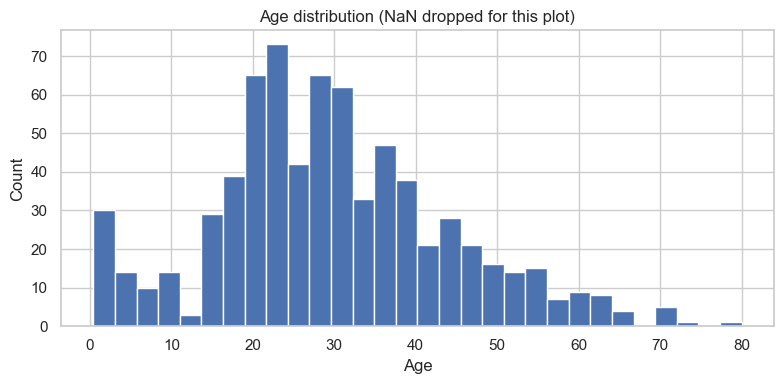

In [47]:
# Step 8: Visualize the distribution of 'age' using a histogram
# Age is continuous and often skewed. Histogram reveals skewness, modes,
# and whether many missing values exist (we drop NaNs for plotting but note the missing count). 
age = df['age'].dropna()
print("Age: mean={:.2f}, median={:.2f}, missing={}".format(df['age'].mean(), df['age'].median(), df['age'].isna().sum()))

plt.figure(figsize=(8,4))
plt.hist(age, bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution (NaN dropped for this plot)')
plt.tight_layout()
plt.show()


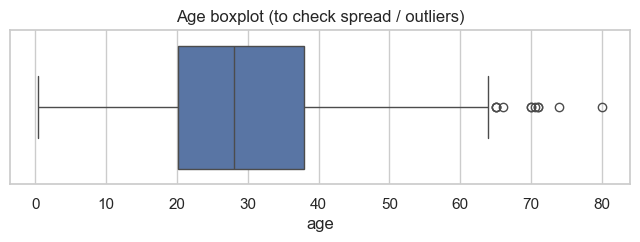

In [48]:
# quick boxplot to see outliers
plt.figure(figsize=(8,2))
sns.boxplot(x=age)
plt.title("Age boxplot (to check spread / outliers)")
plt.show()

Fare: mean=32.30, median=14.45, missing=9


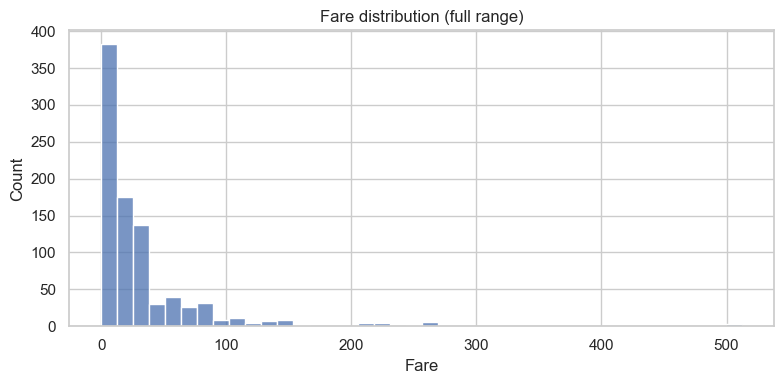

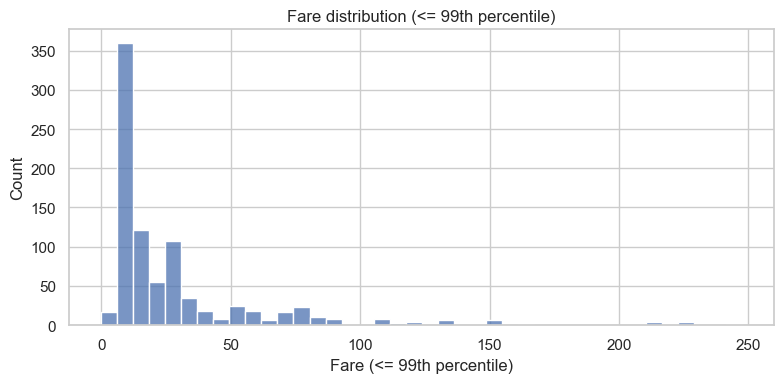

In [49]:
# Step 9: Visualize the distribution of 'fare' using a histogram
#Fare is usually heavily right-skewed with outliers. Plotting the full range often makes the histogram unreadable; l
#imiting to e.g. the 99th percentile helps see the main bulk.
#This guides decisions like log-scaling or clipping before modeling.

fare = df['fare'].dropna()
print("Fare: mean={:.2f}, median={:.2f}, missing={}".format(df['fare'].mean(), df['fare'].median(), df['fare'].isna().sum()))
p99 = fare.quantile(0.99)

plt.figure(figsize=(8,4))
sns.histplot(fare, bins=40, kde=False)
plt.xlabel('Fare')
plt.title('Fare distribution (full range)')
plt.tight_layout()
plt.show()

# zoomed-in view (0..99th percentile) to see main bulk
plt.figure(figsize=(8,4))
sns.histplot(fare[fare <= p99], bins=40, kde=False)
plt.xlabel('Fare (<= 99th percentile)')
plt.title('Fare distribution (<= 99th percentile)')
plt.tight_layout()
plt.show()

### Task 2: Data Preprocessing

1. Fill in missing values in the `age and fare` columns with their median values.
2. Encode the sex column using one-hot encoding.
3. Standardize the fare column using StandardScaler.
4. Select the features `(p_class, sex, age, fare)` and the target variable `(survived)` for modeling.
5. Split the dataset into training and testing sets with a test size of 30%.

In [51]:
# Step 1: Fill in missing values in the 'age' and 'fare' columns with their median values
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

In [52]:
# Step 2: Encode the 'sex' column using one-hot encoding
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

In [53]:
# Step 3: Standardize the 'fare' column using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['fare']] = scaler.fit_transform(df[['fare']])

In [54]:
# Step 4: Select the features and target variable for modeling

X = df[['p_class', 'sex_male', 'age', 'fare']]
y = df['survived']

# Step 5: Split the dataset into training and testing sets with a test size of 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (623, 4) (623,)
Testing set shape: (268, 4) (268,)


### Task 3: Model Training Using Gaussian Naive Bayes

1. Initialize and train a `Gaussian Naive Bayes` model using the training data.
2. Make predictions on the test set using the trained model.
3. Evaluate the model using a classification report and print the report.
4. Visualize the confusion matrix for the model.

In [55]:
# Step 1: Initialize and train a Gaussian Naive Bayes model using the training data
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Step 2: Make predictions on the test set using the trained model
gnb.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [56]:
#Making prediction 
y_pred = gnb.predict(X_test)

In [57]:
# Step 3: Evaluate the model using a classification report and print the report
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7611940298507462
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       165
           1       0.67      0.74      0.70       103

    accuracy                           0.76       268
   macro avg       0.75      0.76      0.75       268
weighted avg       0.77      0.76      0.76       268



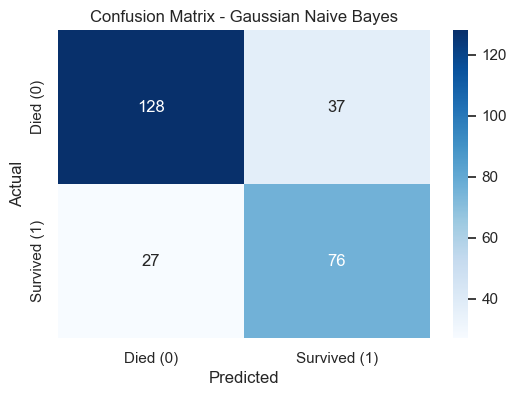

In [58]:
# Step 4: Visualize the confusion matrix for the model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Died (0)', 'Survived (1)'],
            yticklabels=['Died (0)', 'Survived (1)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()